In [1]:
%matplotlib inline

In [2]:
#https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html


[Learn the Basics](intro.html) ||
**Quickstart** ||
[Tensors](tensorqs_tutorial.html) ||
[Datasets & DataLoaders](data_tutorial.html) ||
[Transforms](transforms_tutorial.html) ||
[Build Model](buildmodel_tutorial.html) ||
[Autograd](autogradqs_tutorial.html) ||
[Optimization](optimization_tutorial.html) ||
[Save & Load Model](saveloadrun_tutorial.html)

# Quickstart
This section runs through the API for common tasks in machine learning. Refer to the links in each section to dive deeper.

## Working with data
PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

PyTorch offers domain-specific libraries such as [TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and [TorchAudio](https://pytorch.org/audio/stable/index.html),
all of which include datasets. For this tutorial, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like
CIFAR, COCO ([full list here](https://pytorch.org/vision/stable/datasets.html)). In this tutorial, we
use the FashionMNIST dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and
``target_transform`` to modify the samples and labels respectively.



In [4]:
#Import Jingjing's data
import pickle
filename = 'Cluster_selected_ML.pkl'
unpickleFile = open(filename, 'rb')
new_dict = pickle.load(unpickleFile)
print(new_dict)

#The parameter that we wish to predict is f_true;
#haloid_clu and lambda_true is not observable, so should not be used.

{'cluster_id': array([     127,      242,      324, ..., 27993741, 27994672, 27995320]), 'lambda_true': array([99., 65., 12., ..., 10., 14., 15.]), 'lambda_cluster': array([75.23348215, 39.08997544, 28.14171372, ..., 27.71901123,
       24.0129426 , 22.34607615]), 'f_true': array([0.85052402, 0.96961545, 0.29983303, ..., 0.33802594, 0.50080088,
       0.62941442]), 'e1z': array([ 0.1917921 ,  0.00918005, -0.14495691, ...,  0.03204949,
        0.1693801 ,  0.04185283]), 'e2z': array([-0.14375397,  0.46487602,  0.03464072, ...,  0.28532454,
        0.11537838,  0.29186754]), 'cos_theta': array([0.67947739, 0.01604303, 0.8930102 , ..., 0.93663341, 0.77159482,
       0.78027695]), 'tf_min_value': array([ 2.3541758 ,  0.8758757 ,  0.72274333, ...,  0.13972558,
       -0.37513766, -0.04720242], dtype=float32)}


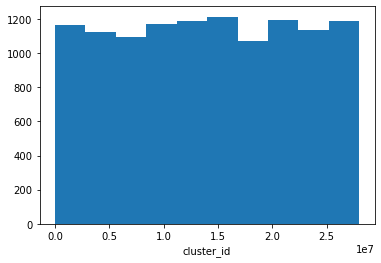

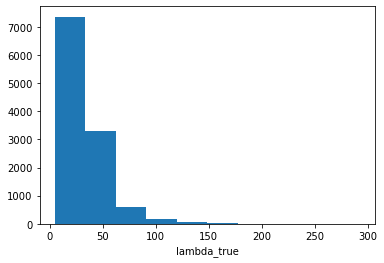

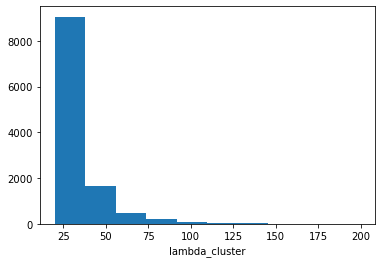

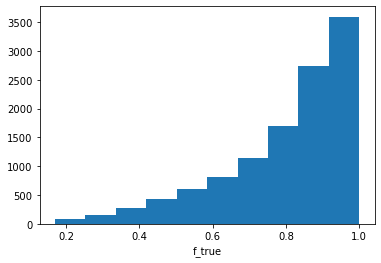

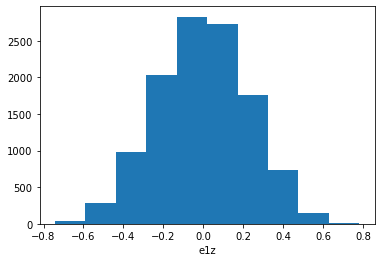

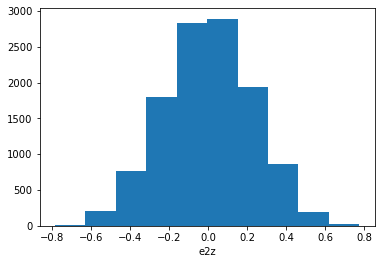

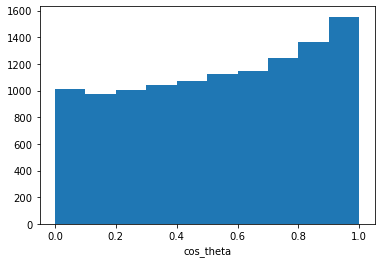

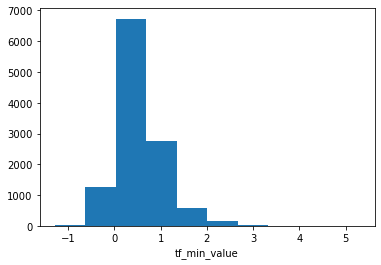

<Figure size 432x288 with 0 Axes>

In [5]:
#Visualise data
classes= ['cluster_id', 'lambda_true', 'lambda_cluster', 'f_true','e1z','e2z','cos_theta', 'tf_min_value']
y = new_dict["f_true"]
for class_now in classes:
    x = new_dict[class_now]
    plt.hist(x)
    plt.xlabel(class_now)
    plt.show()
    plt.clf()

In [6]:
#Put data into arrays
y = new_dict["f_true"]

X1 = new_dict['lambda_true']
#X1 = new_dict['lambda_cluster']
X1 = X1-np.mean(X1)#normalisation
X1 = X1/np.std(X1)

#X2 = new_dict['f_true']
X2 = new_dict['e1z']
X2 = X2-np.mean(X2)#normalisation
X2 = X2/np.std(X2)

X3 = new_dict['e2z']
X3 = X3-np.mean(X3)#normalisation
X3 = X3/np.std(X3)

X4 = new_dict['cos_theta']
X4 = X4-np.mean(X4)#normalisation
X4 = X4/np.std(X4)

X5 = new_dict['tf_min_value']
X5 = X5-np.mean(X5)#normalisation
X5 = X5/np.std(X5)

In [7]:
from torch.utils.data import TensorDataset, DataLoader
X=[]
for i in range(len(X1)):
    X.append([X1[i],X2[i],X3[i],X4[i],X5[i]])

y = np.reshape(y,[11542,1])
    
#Help from here: https://stackoverflow.com/questions/65017261/how-to-input-a-numpy-array-to-a-neural-network-in-pytorch
tensor_X = torch.Tensor(X) # transform to torch tensor
tensor_y = torch.Tensor(y)

We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element
in the dataloader iterable will return a batch of 64 features and labels.



In [8]:
print(np.shape(tensor_X))
print(np.shape(tensor_y))
Ntot = 11542

torch.Size([11542, 5])
torch.Size([11542, 1])


Read more about [loading data in PyTorch](data_tutorial.html).




--------------




## Creating Models
To define a neural network in PyTorch, we create a class that inherits
from [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). We define the layers of the network
in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate
operations in the neural network, we move it to the GPU if available.



In [9]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(5, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
#            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=5, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=1, bias=True)
    (4): Sigmoid()
  )
)


Read more about [building neural networks in PyTorch](buildmodel_tutorial.html).




--------------




## Optimizing the Model Parameters
To train a model, we need a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
and an [optimizer](https://pytorch.org/docs/stable/optim.html).



In [10]:
loss_fn = nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and
backpropagates the prediction error to adjust the model's parameters.



In [11]:
def train(tensor_X, tensor_y, model, loss_fn, optimizer):
    size = Ntot #len(dataloader.dataset)
    model.train()
#    for batch, (X, y) in enumerate(dataloader):
    for i in [0]:#need loop later?
        X, y = tensor_X.to(device), tensor_y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
#        optimizer.Adam()
        loss.backward()
        optimizer.step()

        if True:
#        if batch % 100 == 0:
            loss =  loss.item()
            print("loss:",loss)

We also check the model's performance against the test dataset to ensure it is learning.



In [12]:
def test(tensor_X, tensor_y, model, loss_fn):
    size = Ntot#len(dataloader.dataset)
    num_batches = 1#len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for i in [0]:
            X, y = tensor_X.to(device), tensor_y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
#            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    loss_arr.append(test_loss)
    plt.scatter(tensor_y.to("cpu").numpy(),pred.to("cpu").numpy())
    plt.xlabel("Ground Truth")
    plt.ylabel("Predicted")
    plt.plot([0,1],[0,1],"k",linestyle="dashed")
    plt.show()

The training process is conducted over several iterations (*epochs*). During each epoch, the model learns
parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.



Epoch 1
-------------------------------
loss: 0.10809808224439621


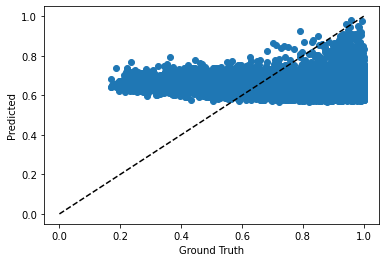

Epoch 2
-------------------------------
loss: 0.05529819428920746


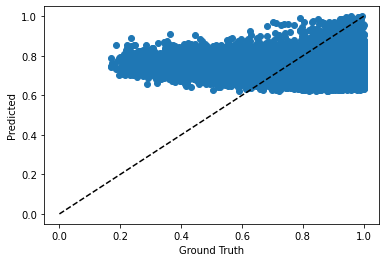

Epoch 3
-------------------------------
loss: 0.037108201533555984


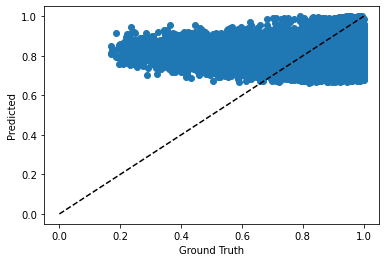

Epoch 4
-------------------------------
loss: 0.03425084426999092


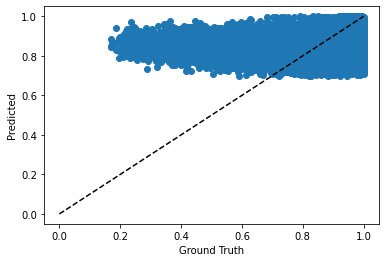

Epoch 5
-------------------------------
loss: 0.03580264374613762


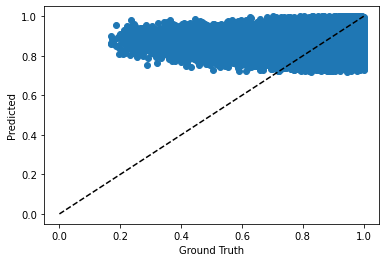

Epoch 6
-------------------------------
loss: 0.037807244807481766


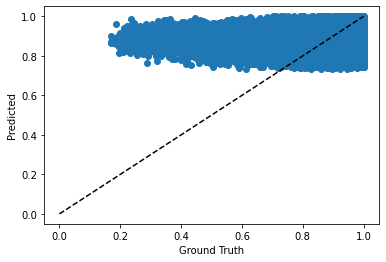

Epoch 7
-------------------------------
loss: 0.03918058052659035


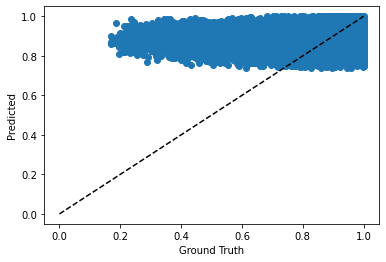

Epoch 8
-------------------------------
loss: 0.03973064571619034


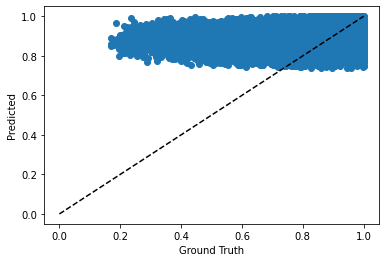

Epoch 9
-------------------------------
loss: 0.03949631750583649


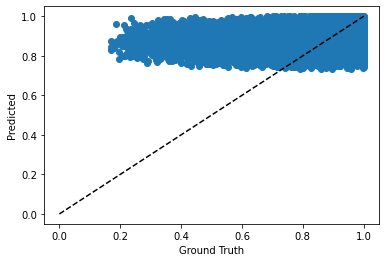

Epoch 10
-------------------------------
loss: 0.03856201469898224


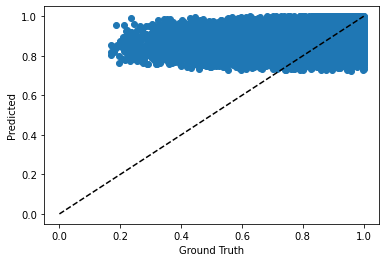

Epoch 11
-------------------------------
loss: 0.037020936608314514


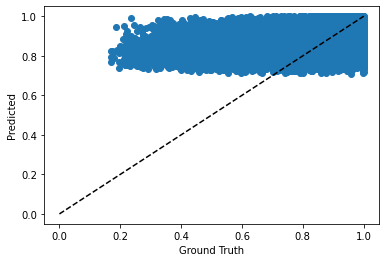

Epoch 12
-------------------------------
loss: 0.03498399630188942


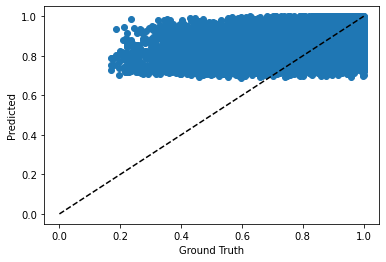

Epoch 13
-------------------------------
loss: 0.03260285034775734


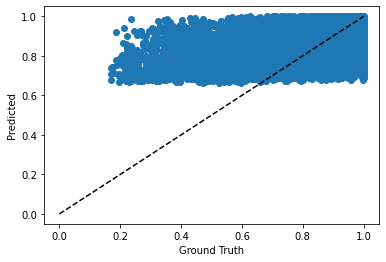

Epoch 14
-------------------------------
loss: 0.030092468485236168


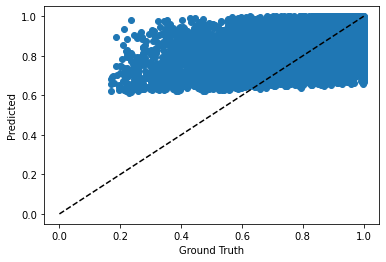

Epoch 15
-------------------------------
loss: 0.027737542986869812


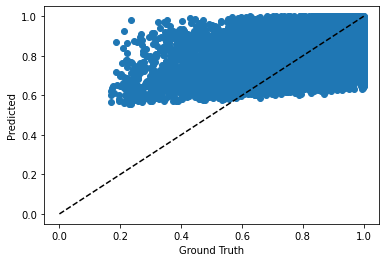

Epoch 16
-------------------------------
loss: 0.02586180716753006


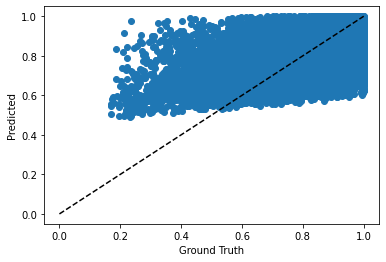

Epoch 17
-------------------------------
loss: 0.024742605164647102


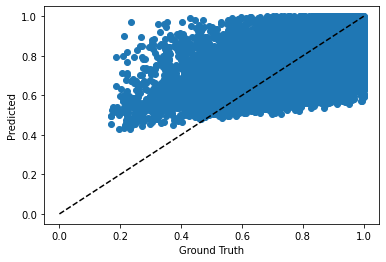

Epoch 18
-------------------------------
loss: 0.024481508880853653


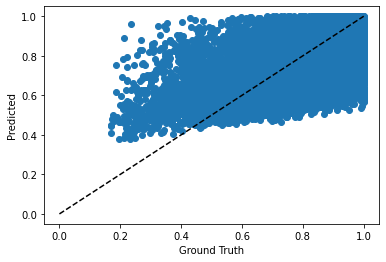

Epoch 19
-------------------------------
loss: 0.024898400530219078


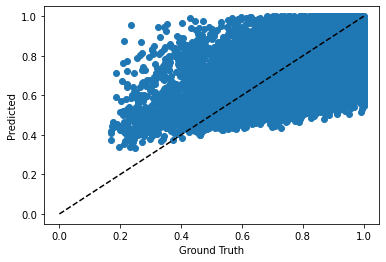

Epoch 20
-------------------------------
loss: 0.025560816749930382


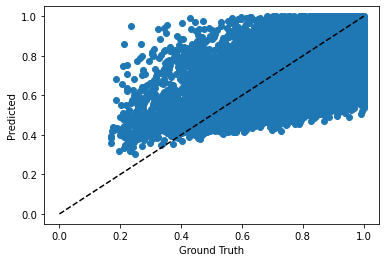

Epoch 21
-------------------------------
loss: 0.025985099375247955


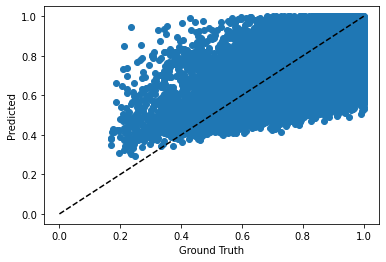

Epoch 22
-------------------------------
loss: 0.025864195078611374


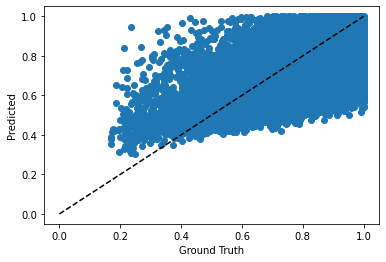

Epoch 23
-------------------------------
loss: 0.0251607783138752


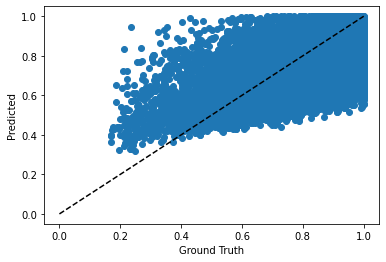

Epoch 24
-------------------------------
loss: 0.024055572226643562


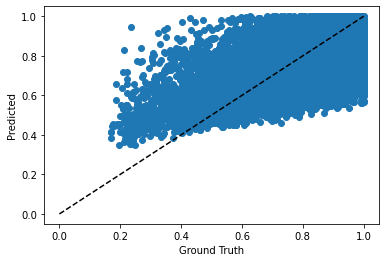

Epoch 25
-------------------------------
loss: 0.022826893255114555


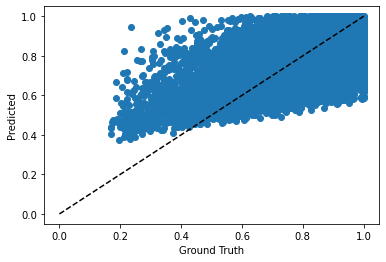

Epoch 26
-------------------------------
loss: 0.021730806678533554


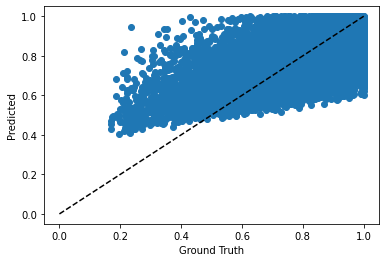

Epoch 27
-------------------------------
loss: 0.020922578871250153


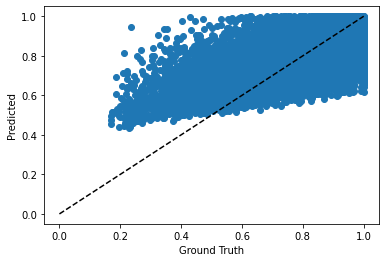

Epoch 28
-------------------------------
loss: 0.020434055477380753


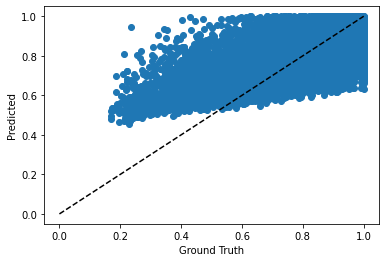

Epoch 29
-------------------------------
loss: 0.020198741927742958


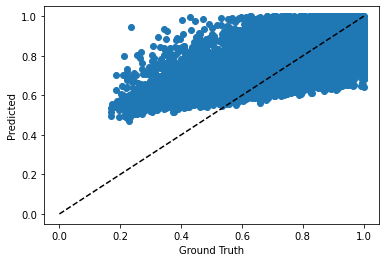

Epoch 30
-------------------------------
loss: 0.020100366324186325


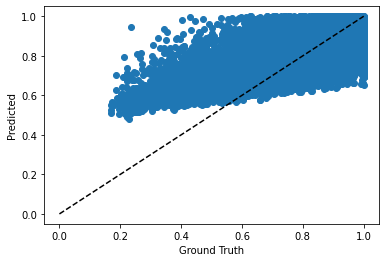

Epoch 31
-------------------------------
loss: 0.020019927993416786


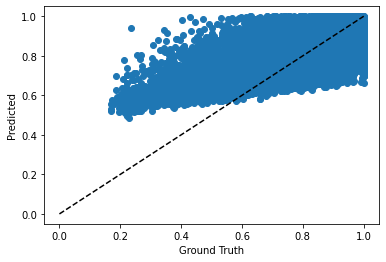

Epoch 32
-------------------------------
loss: 0.01986689865589142


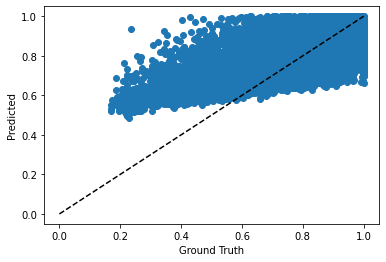

Epoch 33
-------------------------------
loss: 0.019593175500631332


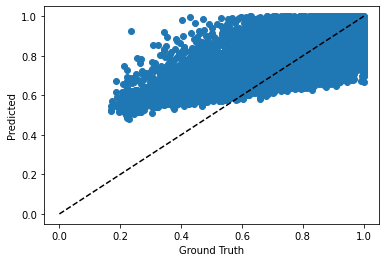

Epoch 34
-------------------------------
loss: 0.019194385036826134


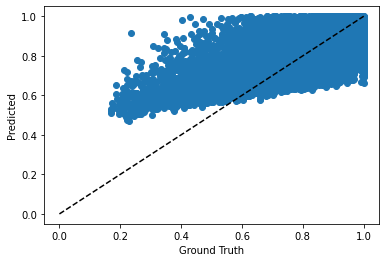

Epoch 35
-------------------------------
loss: 0.018703505396842957


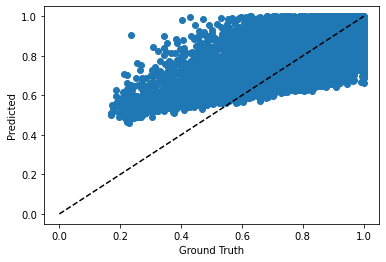

Epoch 36
-------------------------------
loss: 0.018178856000304222


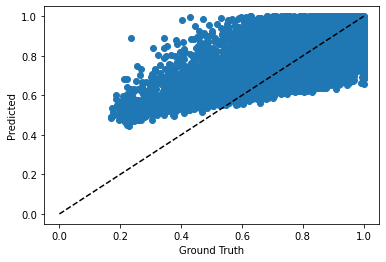

Epoch 37
-------------------------------
loss: 0.017687294632196426


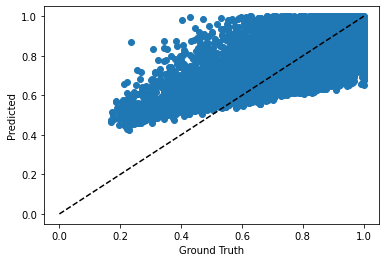

Epoch 38
-------------------------------
loss: 0.017283929511904716


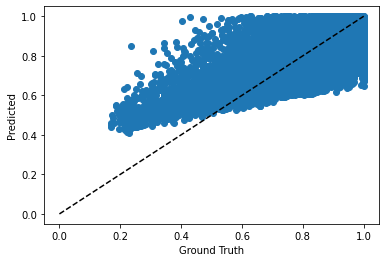

Epoch 39
-------------------------------
loss: 0.01699244976043701


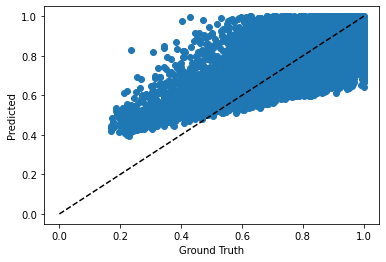

Epoch 40
-------------------------------
loss: 0.016794292256236076


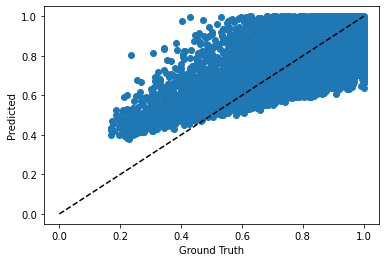

Epoch 41
-------------------------------
loss: 0.016634967178106308


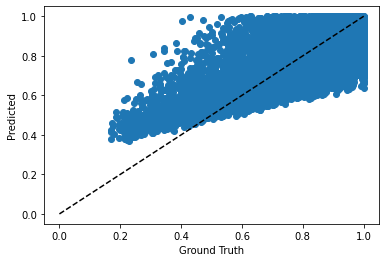

Epoch 42
-------------------------------
loss: 0.016448400914669037


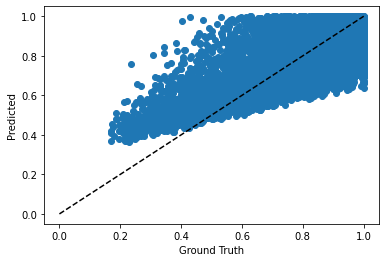

Epoch 43
-------------------------------
loss: 0.016188988462090492


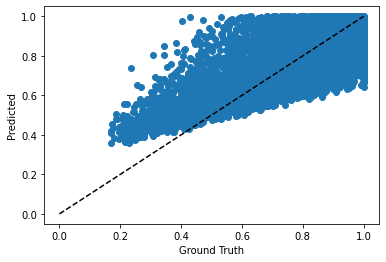

Epoch 44
-------------------------------
loss: 0.015852730721235275


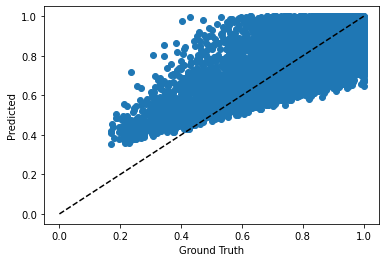

Epoch 45
-------------------------------
loss: 0.015475642867386341


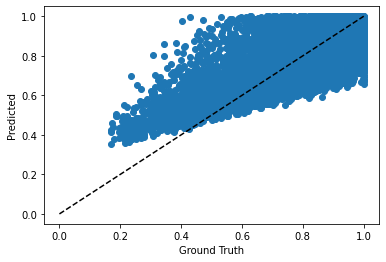

Epoch 46
-------------------------------
loss: 0.01511186733841896


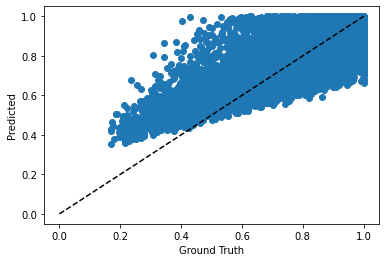

Epoch 47
-------------------------------
loss: 0.014805964194238186


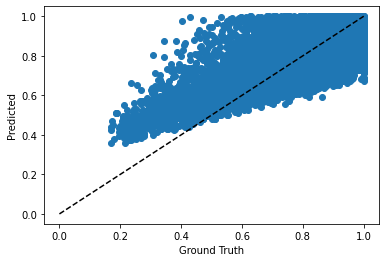

Epoch 48
-------------------------------
loss: 0.014574467204511166


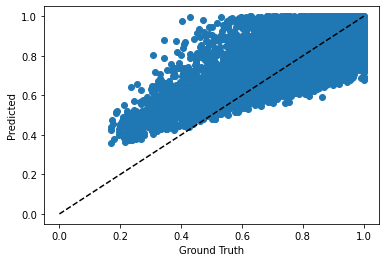

Epoch 49
-------------------------------
loss: 0.01440376229584217


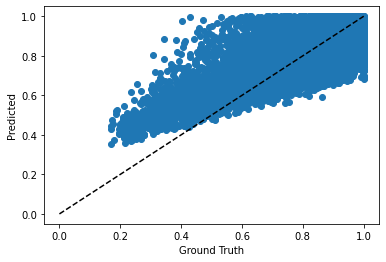

Epoch 50
-------------------------------
loss: 0.014261923730373383


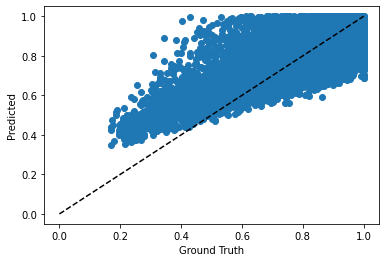

Epoch 51
-------------------------------
loss: 0.014116204343736172


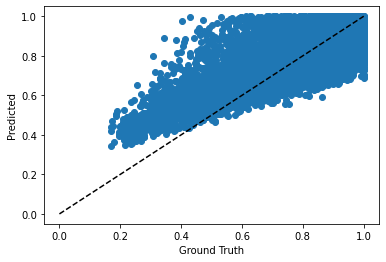

Epoch 52
-------------------------------
loss: 0.013947266153991222


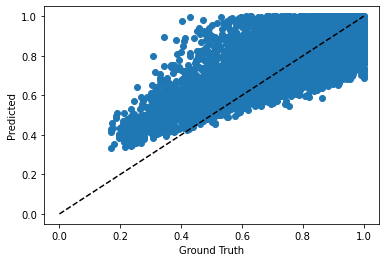

Epoch 53
-------------------------------
loss: 0.013755595311522484


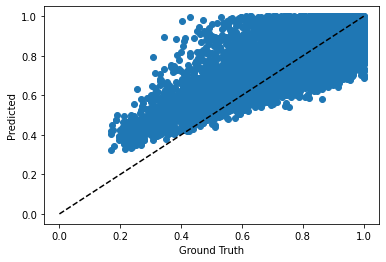

Epoch 54
-------------------------------
loss: 0.013558413833379745


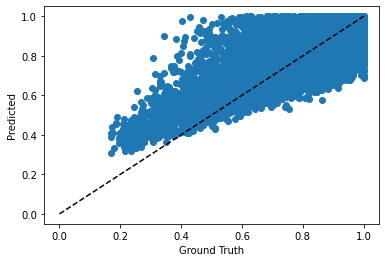

Epoch 55
-------------------------------
loss: 0.013379428535699844


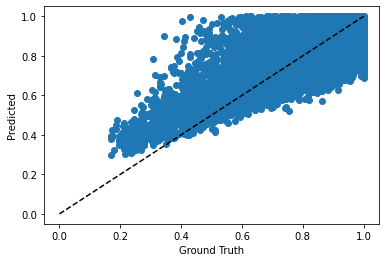

Epoch 56
-------------------------------
loss: 0.013236209750175476


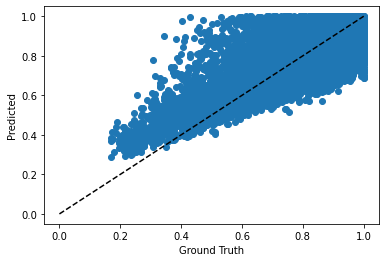

Epoch 57
-------------------------------
loss: 0.01313052512705326


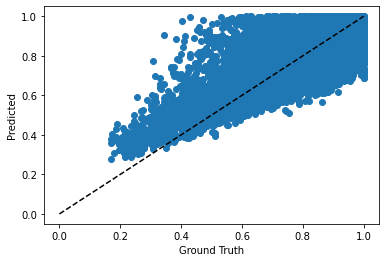

Epoch 58
-------------------------------
loss: 0.013047919608652592


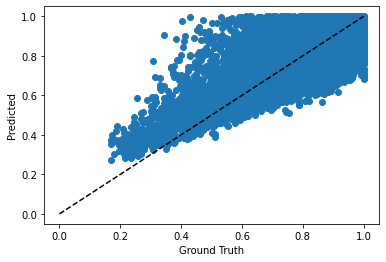

Epoch 59
-------------------------------
loss: 0.012967085465788841


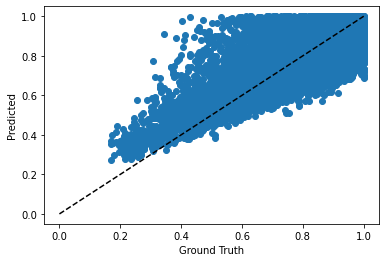

Epoch 60
-------------------------------
loss: 0.012873733416199684


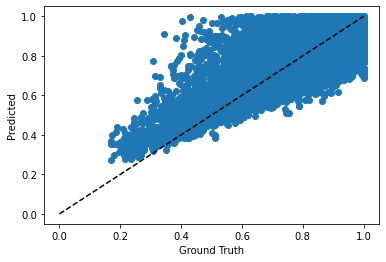

Epoch 61
-------------------------------
loss: 0.012768924236297607


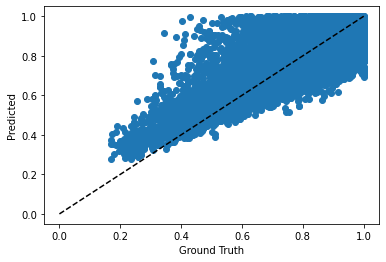

Epoch 62
-------------------------------
loss: 0.012666436843574047


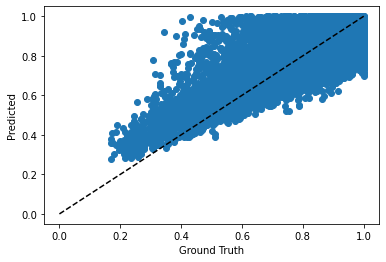

Epoch 63
-------------------------------
loss: 0.012581689283251762


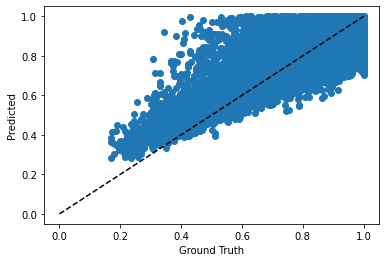

Epoch 64
-------------------------------
loss: 0.012521093711256981


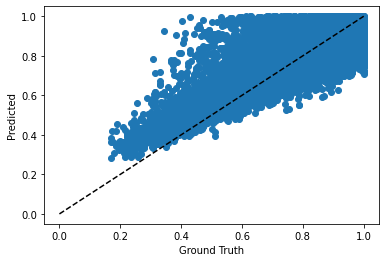

Epoch 65
-------------------------------
loss: 0.012478601187467575


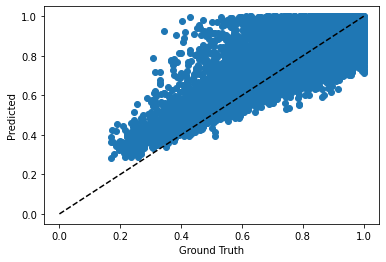

Epoch 66
-------------------------------
loss: 0.012441293336451054


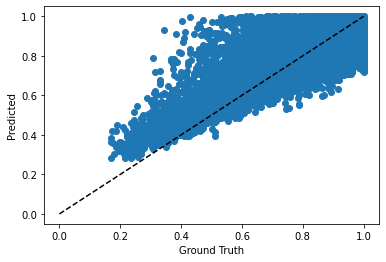

Epoch 67
-------------------------------
loss: 0.012398434802889824


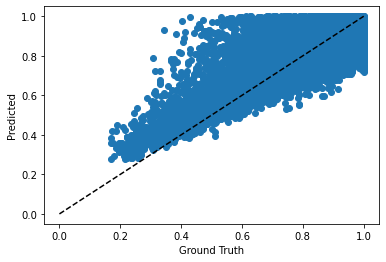

Epoch 68
-------------------------------
loss: 0.012347796931862831


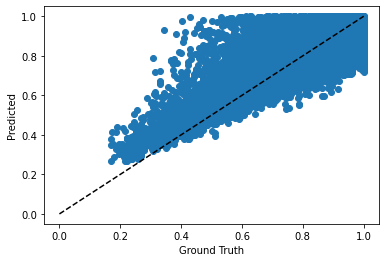

Epoch 69
-------------------------------
loss: 0.012295701541006565


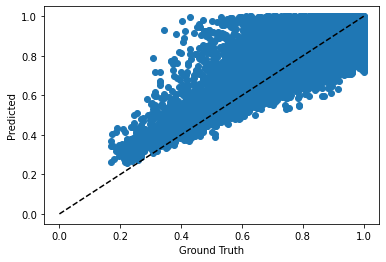

Epoch 70
-------------------------------
loss: 0.012251350097358227


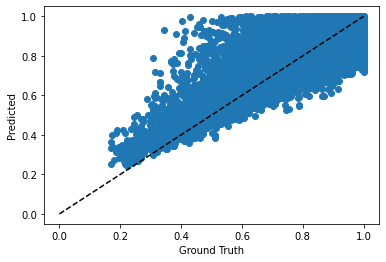

Epoch 71
-------------------------------
loss: 0.012219873256981373


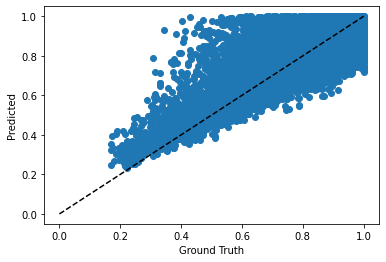

Epoch 72
-------------------------------
loss: 0.01219883468002081


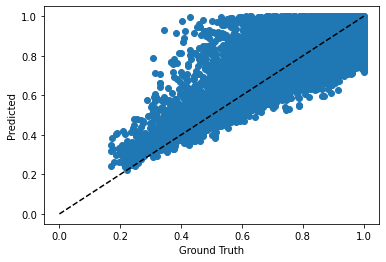

Epoch 73
-------------------------------
loss: 0.012180604971945286


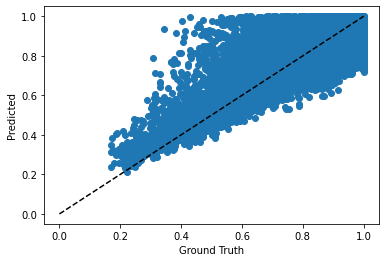

Epoch 74
-------------------------------
loss: 0.012158523313701153


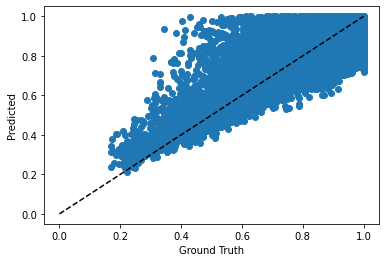

Epoch 75
-------------------------------
loss: 0.0121314637362957


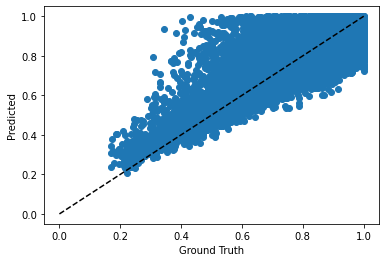

Epoch 76
-------------------------------
loss: 0.012103556655347347


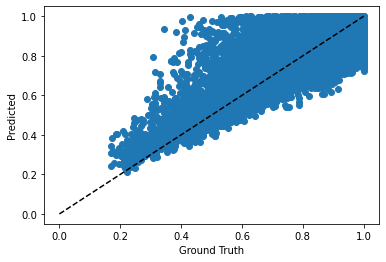

Epoch 77
-------------------------------
loss: 0.01207983959466219


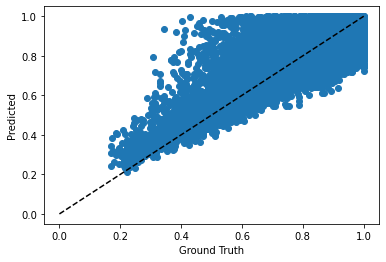

Epoch 78
-------------------------------
loss: 0.012061960995197296


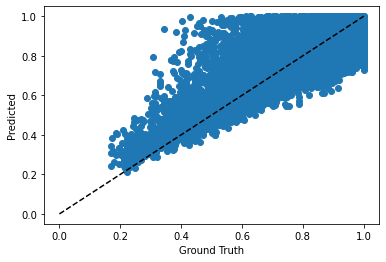

Epoch 79
-------------------------------
loss: 0.012047325260937214


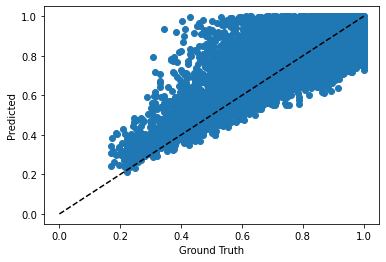

Epoch 80
-------------------------------
loss: 0.012031659483909607


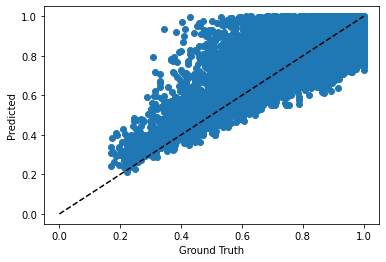

Epoch 81
-------------------------------
loss: 0.012012486346065998


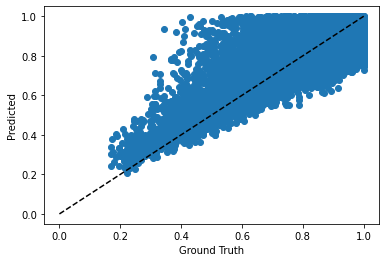

Epoch 82
-------------------------------
loss: 0.011990644969046116


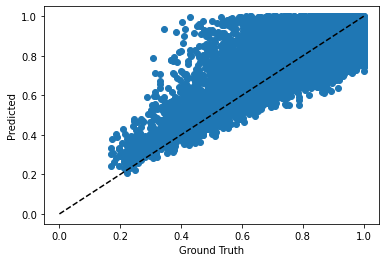

Epoch 83
-------------------------------
loss: 0.011969019658863544


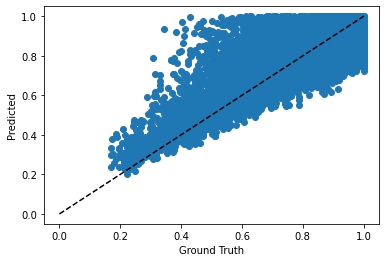

Epoch 84
-------------------------------
loss: 0.01194981299340725


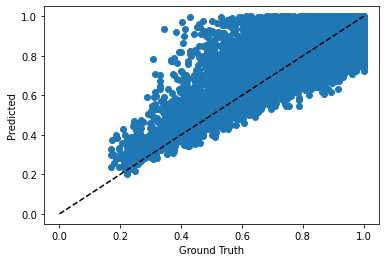

Epoch 85
-------------------------------
loss: 0.011932806111872196


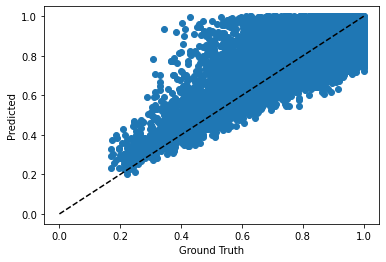

Epoch 86
-------------------------------
loss: 0.011915822513401508


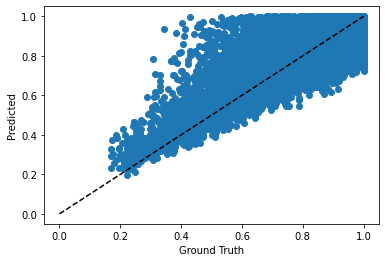

Epoch 87
-------------------------------
loss: 0.011896816082298756


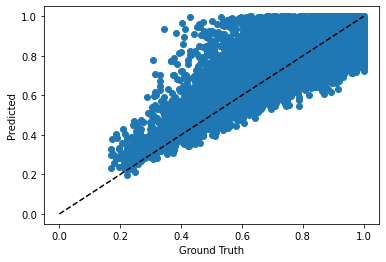

Epoch 88
-------------------------------
loss: 0.011875636875629425


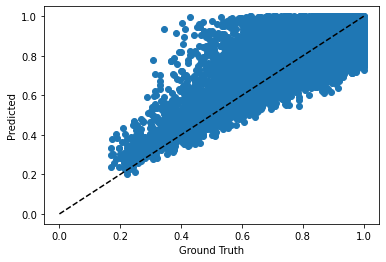

Epoch 89
-------------------------------
loss: 0.011853880248963833


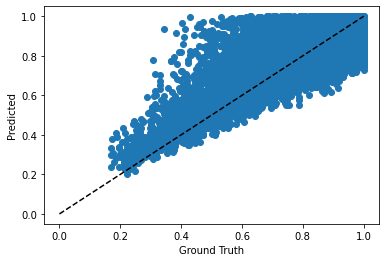

Epoch 90
-------------------------------
loss: 0.011833295226097107


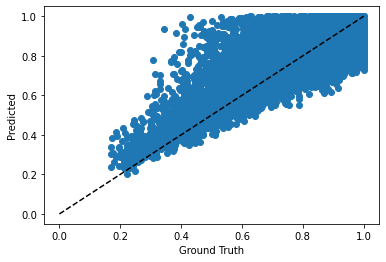

Epoch 91
-------------------------------
loss: 0.011814340017735958


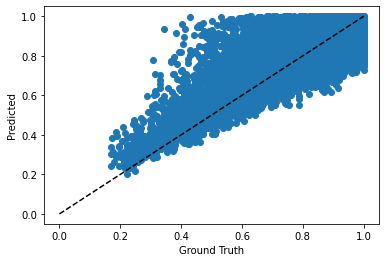

Epoch 92
-------------------------------
loss: 0.011796034872531891


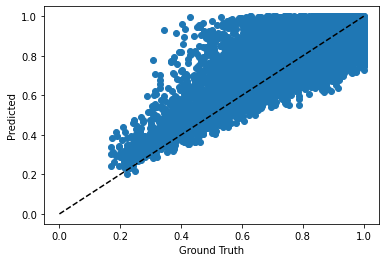

Epoch 93
-------------------------------
loss: 0.011777061969041824


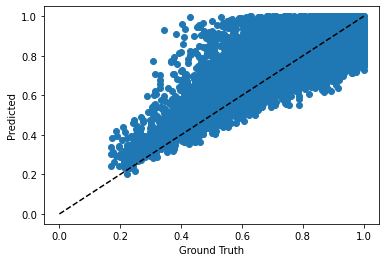

Epoch 94
-------------------------------
loss: 0.011756900697946548


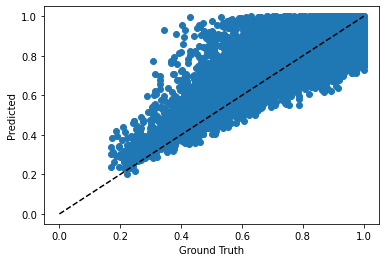

Epoch 95
-------------------------------
loss: 0.011736118234694004


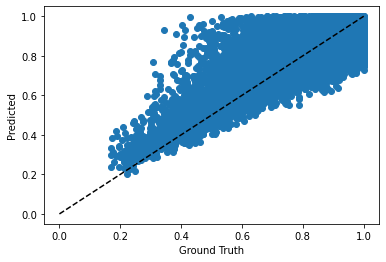

Epoch 96
-------------------------------
loss: 0.011715633794665337


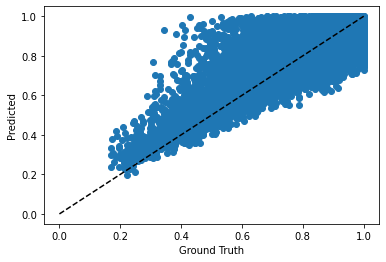

Epoch 97
-------------------------------
loss: 0.01169587578624487


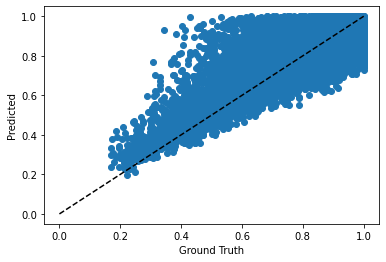

Epoch 98
-------------------------------
loss: 0.011676459573209286


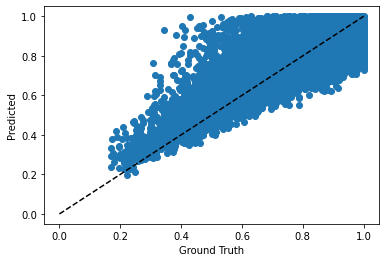

Epoch 99
-------------------------------
loss: 0.01165668573230505


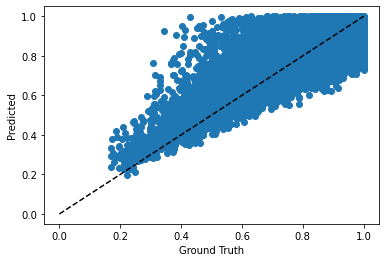

Epoch 100
-------------------------------
loss: 0.011636276729404926


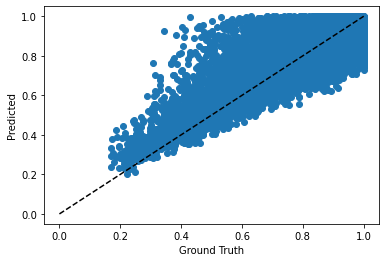

Epoch 101
-------------------------------
loss: 0.011615556664764881


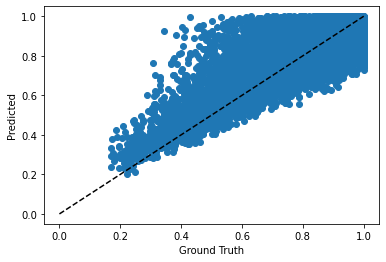

Epoch 102
-------------------------------
loss: 0.01159507967531681


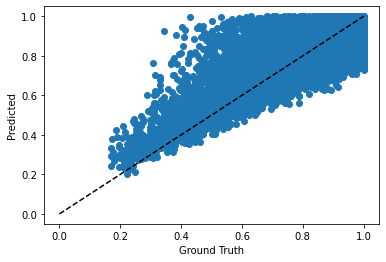

Epoch 103
-------------------------------
loss: 0.011575100012123585


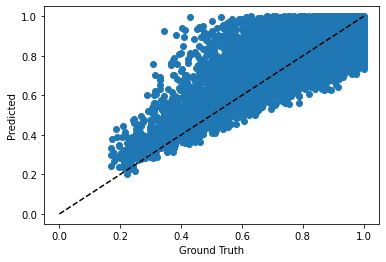

Epoch 104
-------------------------------
loss: 0.01155538484454155


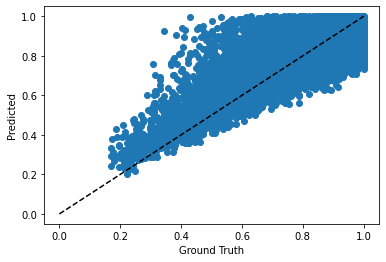

Epoch 105
-------------------------------
loss: 0.011535477824509144


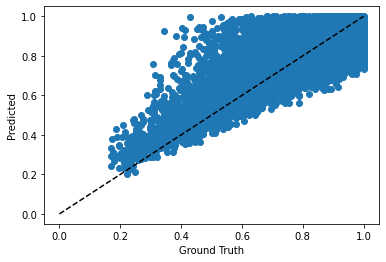

Epoch 106
-------------------------------
loss: 0.011515152640640736


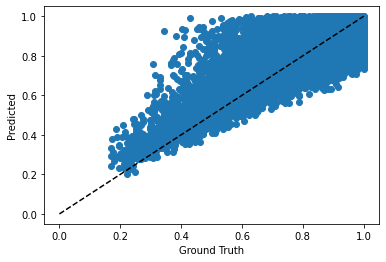

Epoch 107
-------------------------------
loss: 0.011494582518935204


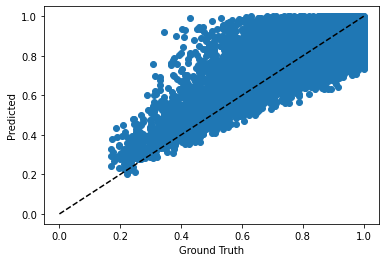

Epoch 108
-------------------------------
loss: 0.011474071070551872


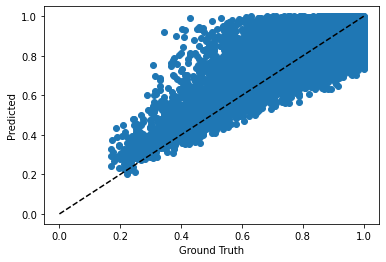

Epoch 109
-------------------------------
loss: 0.011453751474618912


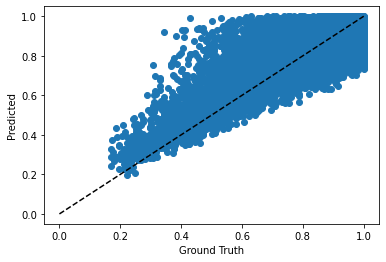

Epoch 110
-------------------------------
loss: 0.01143354456871748


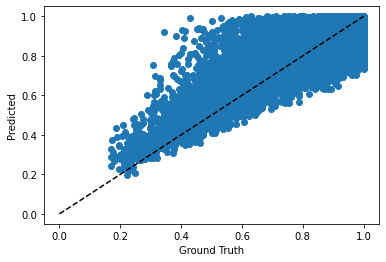

Epoch 111
-------------------------------
loss: 0.011413180269300938


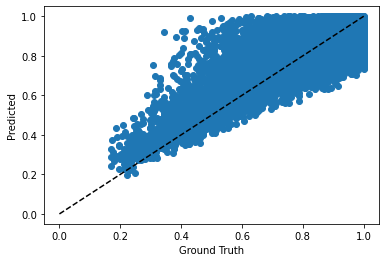

Epoch 112
-------------------------------
loss: 0.011392558924853802


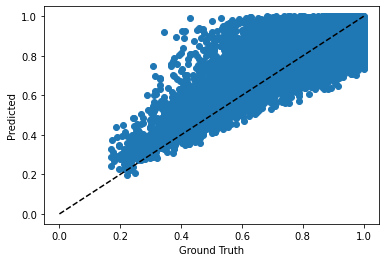

Epoch 113
-------------------------------
loss: 0.011371738277375698


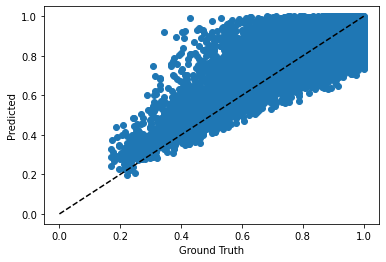

Epoch 114
-------------------------------
loss: 0.011350812390446663


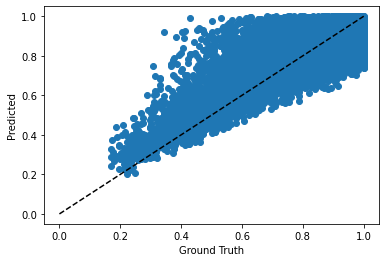

Epoch 115
-------------------------------
loss: 0.011329853907227516


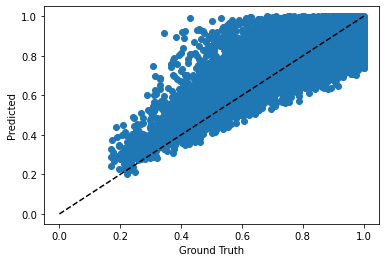

Epoch 116
-------------------------------
loss: 0.011308764107525349


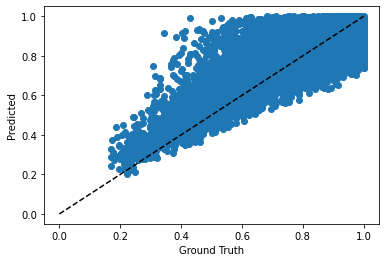

Epoch 117
-------------------------------
loss: 0.011287386529147625


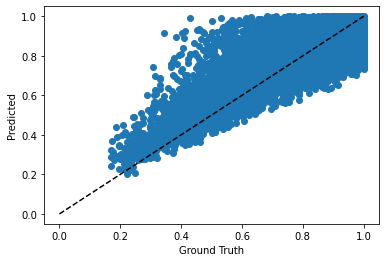

Epoch 118
-------------------------------
loss: 0.01126572024077177


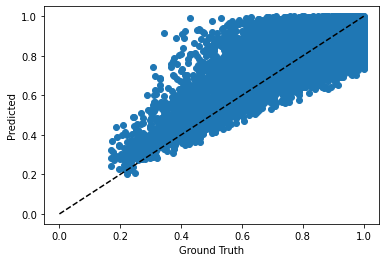

Epoch 119
-------------------------------
loss: 0.011243843473494053


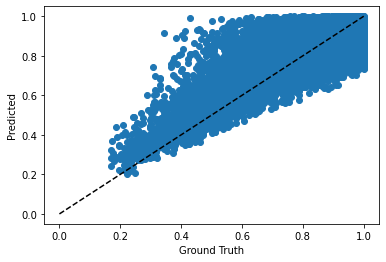

Epoch 120
-------------------------------
loss: 0.011221830733120441


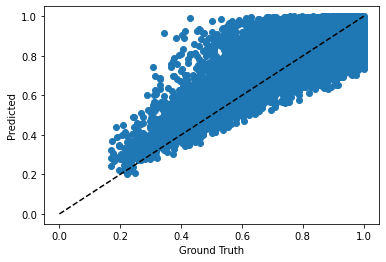

Epoch 121
-------------------------------
loss: 0.011199705302715302


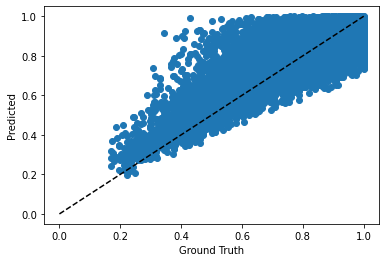

Epoch 122
-------------------------------
loss: 0.01117734331637621


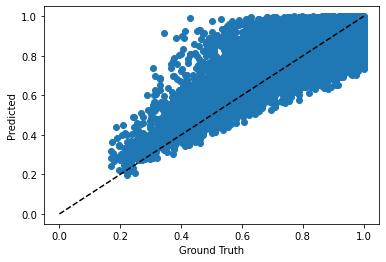

Epoch 123
-------------------------------
loss: 0.011154720559716225


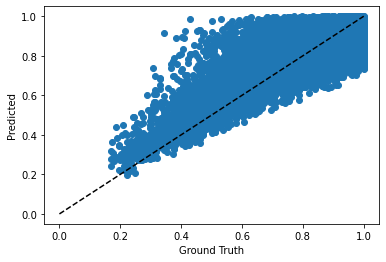

Epoch 124
-------------------------------
loss: 0.011131828650832176


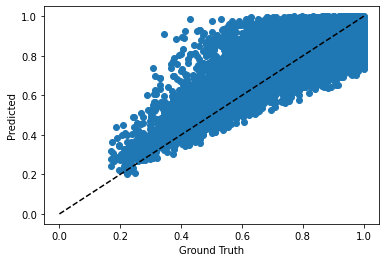

Epoch 125
-------------------------------
loss: 0.011108675971627235


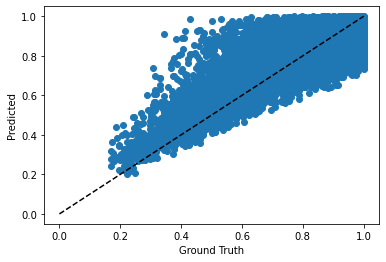

Epoch 126
-------------------------------
loss: 0.011085347272455692


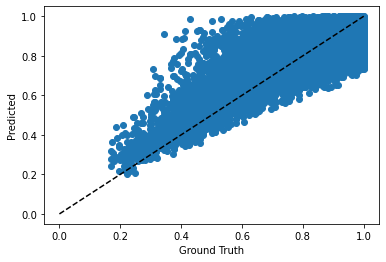

Epoch 127
-------------------------------
loss: 0.011061838828027248


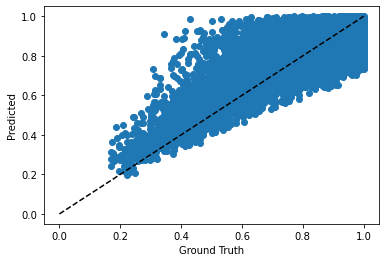

Epoch 128
-------------------------------
loss: 0.011038119904696941


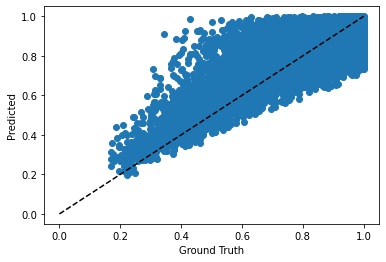

Done!


In [13]:
loss_arr = []

epochs = 128
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(tensor_X, tensor_y, model, loss_fn, optimizer)
    test(tensor_X, tensor_y, model, loss_fn)
print("Done!")

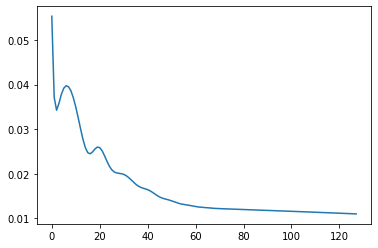

In [14]:
plt.plot(loss_arr)
#plt.yscale("log")